In [618]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sbn
%matplotlib inline
from sklearn.decomposition import PCA
from statsmodels.graphics.api import abline_plot
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import Lasso,Ridge
from sklearn import svm
from sklearn.linear_model import LinearRegression


### Question 1. Fit a polynomial model 
of degree $M=10$ to the data below. Perform Lasso regularization, fitting the model over data1_1, selecting the optimal value of the regularization parameter over the data1_2 (based on validation R2) and testing performance over the data1_3.

Important - standardize the data before training Lasso model and apply the same $\mu$ and $\sigma$ defined over data1_1 to data1_2 and data1_3 during validation/testing (as we are not supposed to learn anything, including normalization coefficients from validation and test data; all the parameters of the model are to be learned from training data exclusively).

Visualize the final model against all the data from from training, validation and test samples on the same plot using different colors for points from different samples. For comparison also visualize the true model used to generate the data below - $y=x^4/100+x^3/20+x^2/3+2x$.

Output the coefficients of the model.

### For the convience of standardize, I modified the original data, keep the data1 as the raw data1 instead of data1=data1.loc[0:39].

In [443]:
#generate data and put it in the dataframe
np.random.seed(2018)
x=np.arange(-10,20,0.5)
y=x**4/100+x**3/20+x**2/3+2*x+np.random.normal(loc=0,scale=3,size=60)
data1=pd.DataFrame({'x':x,'y':y}) #create a dataframe
#slice the data in three pieces (we'll talk about those later)
data1_2=data1.loc[40:49]
data1_3=data1.loc[50:59]
# data1=data1.loc[0:39] 
data1.head()#for now let's stick with this first one
# loc / iloc[:,0]
# iloc[::2,0]

,x,y
0,-10.0,62.503031
1,-9.5,51.410761
2,-9.0,44.605198
3,-8.5,24.739247
4,-8.0,22.200164


### A quick look of distribution.

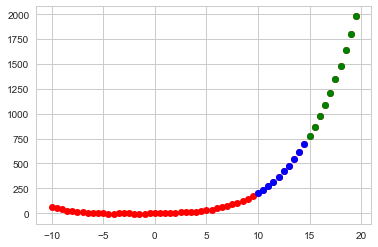

In [444]:
plt.plot(data1.x,data1.y,'or')
plt.plot(data1_2.x,data1_2.y,'ob')
plt.plot(data1_3.x,data1_3.y,'og')

# generate regressors for data1, data1_2, data1_3

### Apply a linear regression at first

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     88.28
Date:                Sun, 21 Oct 2018   Prob (F-statistic):           2.97e-13
Time:                        12:48:30   Log-Likelihood:                -430.67
No. Observations:                  60   AIC:                             865.3
Df Residuals:                      58   BIC:                             869.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.7167     47.476      1.974      0.0

/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


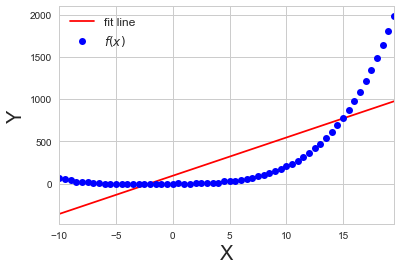

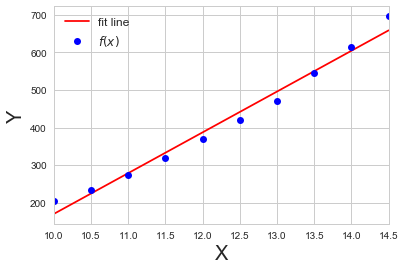

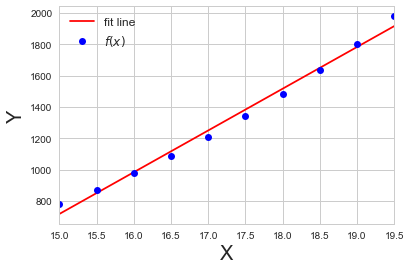

In [445]:
dataset = [data1, data1_2, data1_3]
for i in dataset:
    mod = smf.ols(formula='y ~ x', data = i).fit()
    print(mod.summary())
    abline_plot(model_results=mod, color='red',label='fit line')
    plt.xlabel('X', fontsize = 20)
    plt.ylabel('Y', fontsize = 20)
    plt.plot(i['x'],i['y'],'bo', label='$f(x)$')
    plt.legend(fontsize=12)


In [77]:
#consider just the model of degree M=10

In [78]:
#standardise the data including validation and test sets (using normalization learned from training)

In [79]:
#fit Lasso for various alpha and tune it to optimize Validation R2

In [80]:
#report test R2

In [81]:
#visualize the model against all the data from training, validation and test samples 

In [446]:
scaler = preprocessing.StandardScaler()
X = np.array(data1['x']).reshape([-1,1])
Y = np.array(data1['y']).reshape([-1,1])
X_sca = scaler.fit_transform(X)
# scaler.fit(x)
# tansform(x)
Y_sca = scaler.fit_transform(Y)
# X_poly = preprocessing.PolynomialFeatures(degree=4, interaction_only=False, include_bias=True).fit_transform(X_sca)


In [447]:
X_trainraw = X_sca[0:39]
X_valiraw = X_sca[40:49]
X_testraw = X_sca[50:59]
Y_train = Y_sca[0:39]
Y_vali = Y_sca[40:49]
Y_test = Y_sca[50:59]
# predict = []
# print(Y_train,Y_test)
# alfa = [0.0001,0.001,0.01,0.1]
X_train = preprocessing.PolynomialFeatures(degree=10, interaction_only=False, include_bias=True).fit_transform(X_trainraw)
X_test = preprocessing.PolynomialFeatures(degree=10, interaction_only=False, include_bias=True).fit_transform(X_testraw)
X_vali = preprocessing.PolynomialFeatures(degree=10, interaction_only=False, include_bias=True).fit_transform(X_valiraw)
# print(X_train)

In [448]:
alphas = np.exp(np.linspace(-40,0,40))
best = {}
for alfa in alphas:
    sklearn_lasso = linear_model.Lasso(fit_intercept=True,alpha=alfa,normalize=False)
    model = sklearn_lasso.fit(X_train,Y_train)
#     predict_y = model.predict(X_test)
    predict_R2 = model.score(X_vali,Y_vali)
#     R2 = model.score(X_train,Y_train)
#     return predict_R2
    best[predict_R2] = alfa
#     print('alpha=',alfa)
#     print('Train R2:',R2)
#     print('Test R2:',predict_R2)
#     print('----------------------')

/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

In [449]:
print('best alpha:', best[sorted(list(best.keys()))[-1]])
print('best R2:', sorted(list(best.keys()))[-1])
best_alfa = best[sorted(list(best.keys()))[-1]]

best alpha: 4.248354255291589e-18
best R2: 0.8340850521882363


In [450]:
def func_lasso(alfa):
    sklearn_lasso = linear_model.Lasso(fit_intercept=True,alpha=alfa,normalize=False)
    model = sklearn_lasso.fit(X_train,Y_train)
    predict_y = model.predict(X_test)
    predict_R2 = model.score(X_test,Y_test)
    R2 = model.score(X_train,Y_train)
#     R2 = model.score(X_train,Y_train)
#     return predict_R2
    print('alpha=',alfa)
    print('Train R2:',R2)
    print('Test R2:',predict_R2)
#     print('----------------------')
    figure,ax = plt.subplots(figsize=(6,6))
    plt.plot(X_testraw,predict_y,'--',label='alpha=%s predict model'%(alfa))
    plt.plot(X_testraw,Y_test,'.',markersize=8,label='origin test y value')
    plt.legend(fontsize=12)

alpha= 4.248354255291589e-18
Train R2: 0.9947338752630853
Test R2: 0.1341052105978887


/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


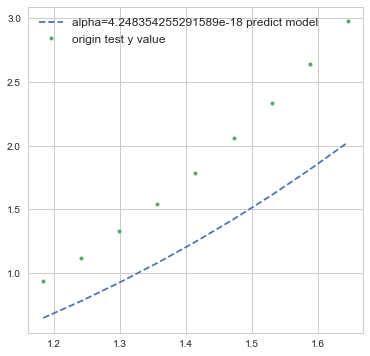

In [451]:
sbn.set(style='whitegrid')
func_lasso(best_alfa)

### From the output above, I assume that when alpha = 0.0001, the model has the highest R sqaure in the test. Thus, I am going to apply this model to all the data.

/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


alpha= 4.248354255291589e-18
Train R2: 0.9947338752630853
Test R2: 0.9217436874882937


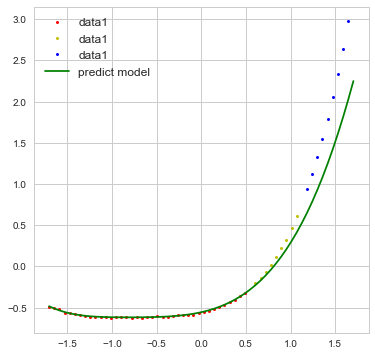

In [452]:
X_poly = preprocessing.PolynomialFeatures(degree=10, interaction_only=False, include_bias=True).fit_transform(X_sca)
sklearn_lasso = linear_model.Lasso(alpha=best_alfa,normalize=False)
model = sklearn_lasso.fit(X_train,Y_train)
predict_y = model.predict(X_poly)
predict_R2 = model.score(X_poly,Y_sca,sample_weight=None)
R2 = model.score(X_train,Y_train)
print('alpha=',best_alfa)
print('Train R2:',R2)
print('Test R2:',predict_R2)
#     print('----------------------')
figure,ax = plt.subplots(figsize=(6,6))
# plt.plot(X_trainraw,Y_train,'bo',markersize=10,label='data1_2')
# plt.plot(X_testraw,Y_test,'ro',markersize=10,label='data1_3')
plt.plot(X_sca[0:39],Y_sca[0:39],'ro',markersize=3,label='data1')
plt.plot(X_sca[40:49],Y_sca[40:49],'yo',markersize=3,label='data1')
plt.plot(X_sca[50:59],Y_sca[50:59],'bo',markersize=3,label='data1')
plt.plot(X_sca,predict_y,'g-',label='predict model')
plt.legend(fontsize=12)

### Question 2. P-values and hypothesis testing
Suppose that a multiple regression with 7 regressors gave the following p-values for each of them:
0.02, 0.1, 3e-15, 0.04, 0.001, 0.06, 0.03.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero at the 95% confidence level? Please explain.

#### When alpha = 95%, p = 0.05, and when we are able to reject a null hypothesis at 95% confidence level, the alpha > 95%, thus p < 0.05. In this case, we can reject the null hypothesis at 95% confidence level in the regressor 1,3,4,5,7 

### Question 3. Confidence intervals
Assume we perform a regression and get an estimate 10 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 95%-confidence interval is [-5, 5]

b. 99%-conficence interval is [9.99,10.01]

c. 95%-confidence interval is [9,100]

d. 99%-confidence interval is [8, 12], while 95%-confidence interval is [9, 11].

Explain your choices

# a

#### a is wrong. In a, the range of coefficient is from negative number to positive number, and estimate 10 is not in this range, it is meanningless. 

# Principal component regression

### Question 4

Using the median price per sq.foot from Zillow data below as reported for 2018-08, fit the linear model using N leading principal components of the 311 data and perform cross-validation. Visualize performance depending on the number N of leading PCs. Specifically: 
    1. implement a 20-times-cross-validation as a function of N returing OS R2
    2. run it for N=1,2,...30, return the best N and the corresponding R2
    3. mark it with a vertical line on the plot and put the value of N and the corresponding R2 as text labels
**Important:** keep training pca over the training sample only, applying the same pca transform to the test samples in order to prepare regressors for them

In [528]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score


In [529]:
# Write code here
zillow=pd.read_csv("ads_hw3_data/Zip_MedianListingPricePerSqft_AllHomes.csv",index_col=0)
zillow = zillow[zillow['City']=='New York']
zillow.columns

Index(['City', 'State', 'Metro', 'CountyName', 'SizeRank', '2010-01',
       '2010-02', '2010-03', '2010-04', '2010-05',
       ...
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '2018-05', '2018-06', '2018-07', '2018-08'],
      dtype='object', length=109)

In [530]:
zillow = zillow[['City','State', 'Metro', 'CountyName', 'SizeRank','2018-08']]
zillow = zillow.dropna(axis = 0, how = 'any')
zillow.head()

,City,State,Metro,CountyName,SizeRank,2018-08
RegionName,,,,,,
10023,New York,NY,"New York, NY",New York,1,1619.794484
10002,New York,NY,"New York, NY",New York,4,2030.259366
10016,New York,NY,"New York, NY",New York,11,1456.997085
11235,New York,NY,"New York, NY",Kings,13,575.000000
10009,New York,NY,"New York, NY",New York,18,1798.307475


**Load/process 311 data**

In [531]:
data311 = pd.read_csv( 'ads_hw3_data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [532]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)

In [533]:
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0.000000,0.000000,0.008772,0.0,0.000000,0.008772,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.070175,0.070175,0.000000,0.000000,0.000000,0.0,0.0
10001.0,0.000000,0.000146,0.013179,0.0,0.000000,0.000146,0.002929,0.005272,0.000146,0.000146,...,0.000439,0.000000,0.000293,0.007468,0.000732,0.000732,0.000293,0.053595,0.0,0.0
10002.0,0.001330,0.000000,0.007095,0.0,0.000000,0.001862,0.001596,0.001774,0.000177,0.000532,...,0.000443,0.000089,0.000355,0.002394,0.001242,0.000887,0.000621,0.028734,0.0,0.0
10003.0,0.001331,0.000089,0.012690,0.0,0.000177,0.003905,0.002130,0.001154,0.000177,0.000177,...,0.000621,0.000976,0.000177,0.004792,0.002218,0.001065,0.000444,0.028219,0.0,0.0
10004.0,0.000000,0.000000,0.009740,0.0,0.000000,0.002597,0.001948,0.000649,0.000000,0.000649,...,0.000649,0.000649,0.000000,0.010390,0.013636,0.000000,0.000000,0.024026,0.0,0.0


In [534]:
zillow = zillow.drop(columns=['City', 'State', 'Metro', 'CountyName','SizeRank'])
len(zillow)

100

In [535]:
zillow.index = zillow.index.astype('int')
data311.index = data311.index.astype('int')

In [536]:
zillow = zillow.dropna()

In [537]:
data311.columns

Index(['APPLIANCE', 'Adopt-A-Basket', 'Air Quality', 'Animal Abuse',
       'Animal Facility - No Permit', 'Animal in a Park', 'Asbestos',
       'BEST/Site Safety', 'Beach/Pool/Sauna Complaint', 'Bike Rack Condition',
       ...
       'Unsanitary Pigeon Condition', 'Urinating in Public', 'Vacant Lot',
       'Vending', 'Violation of Park Rules', 'Water Conservation',
       'Water Quality', 'Water System', 'Window Guard',
       'X-Ray Machine/Equipment'],
      dtype='object', name='Complain', length=162)

In [538]:
all_data = data311.merge(zillow, left_on=data311.index, right_on='RegionName',how='inner')
all_data.head()
data311 = all_data.drop(columns={'RegionName','2018-08'})
zillow = all_data['2018-08']

In [539]:
scaler311 = preprocessing.StandardScaler()
data311S=scaler311.fit_transform(data311) 

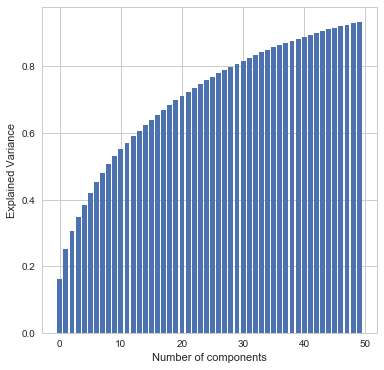

In [540]:
pca = PCA(n_components=50)
data311P=pca.fit_transform(data311S)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=50
plt.figure(figsize=(6,6))
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

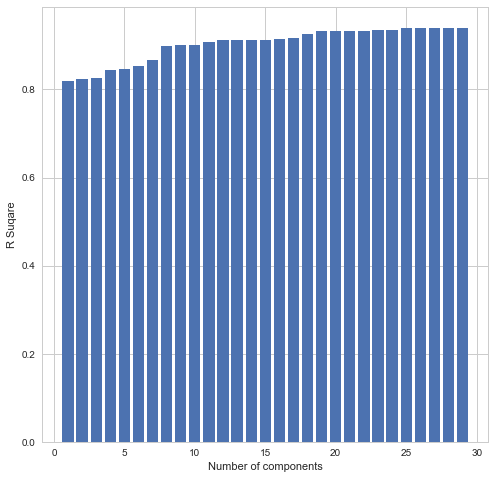

In [541]:
N = range(1, 30)
zillow_data = np.array(zillow)
R2 = []

for i in N:
    pca = PCA(n_components=i)
    data311P_1=pca.fit_transform(data311S)
    eigenvalues = pca.explained_variance_ratio_
    reg = LinearRegression().fit(data311P_1, zillow_data)
    R2.append(reg.score(data311P_1, zillow_data))
plt.figure(figsize=(8,8))
plt.bar(N,R2)
plt.xlabel("Number of components")
plt.ylabel("R Suqare")
plt.show()

### When n_compnents = 30, we have the highest R square.

In [542]:
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn import svm

In [543]:
pca = PCA(n_components=30)
data311P=pca.fit_transform(data311S)

In [554]:
clf = Lasso()
scores = cross_validate(clf, data311P,zillow_data, cv=20,return_train_score=True)
print('best test R2 in test:', sorted(scores['test_score'])[-1])
print('average test R2 in test:', scores['test_score'].mean())
print('best test R2 in train:', sorted(scores['train_score'])[-1])
print('average train R2 in test:', scores['train_score'].mean())
# print(scores)
test_score = scores['test_score']
train_score = scores['train_score']
cross_validation_time = range(20)
# plt.figure(figsize=(8,8))
# plt.plot(cross_validation_time,test_score,label='test R2')
# plt.plot(cross_validation_time,train_score,label='train R2')
# plt.legend(fontsize=14)

best test R2 in test: 0.9371165112249314
average test R2 in test: -9.419675796760135
best test R2 in train: 0.9491028049533606
average train R2 in test: 0.9439839034060723


# Question 5
1. Using the Zillow dataset from question 4, run PCA on the price dynamics for zip codes over the last 5 years 
    1. take only those zip codes within NYC having price defined for the last 60 months from 2013-09 till 2018-08:
    2. normalize each zip code timeline by average price over this period
    3. standardize those normalized prices per month and use them as features
    4. run pca over those features

2. Visualize zip codes in the 2d space of first two principal components, coloring them by borough (feel free to use borough definition from the class notebook). 

In [582]:
zillow=pd.read_csv("ads_hw3_data/Zip_MedianListingPricePerSqft_AllHomes.csv",index_col=0)
zillow.head()

,City,State,Metro,CountyName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,New York,NY,"New York, NY",New York,1,NaN,NaN,NaN,NaN,1366.621067,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
60614,Chicago,IL,"Chicago, IL",Cook,2,347.391304,333.975410,332.666667,324.490763,325.832510,...,514.255544,522.193211,519.321330,520.408163,476.592732,463.928571,470.769231,461.960986,455.861397,436.111111
79936,El Paso,TX,"El Paso, TX",El Paso,3,88.688320,88.159032,87.940589,87.929656,87.368706,...,88.419016,88.540363,88.755279,88.455330,88.367347,89.118199,90.128755,90.316333,90.726125,91.668726
10002,New York,NY,"New York, NY",New York,4,NaN,NaN,NaN,NaN,NaN,...,2041.247701,2043.165468,2063.785322,2012.302285,2015.369804,2026.353276,2022.274326,2013.831259,1997.942387,2030.259366
926,San Juan,TX,"Brownsville, TX",Cameron,5,NaN,NaN,NaN,NaN,NaN,...,92.968750,92.954963,93.776641,92.968750,95.090118,103.846154,100.411523,108.447489,102.270729,102.270729


In [583]:
zillow = zillow[zillow['City']=='New York']
zillow = zillow.drop(columns={'City','State','Metro','CountyName'})

# zillow.head()

In [584]:
zillow = zillow.iloc[:,45:105]

In [585]:
zillow.dropna(axis = 0, how = 'any',inplace=True)
zillow.head()

,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
RegionName,,,,,,,,,,,,,,,,,,,,,
10023,1671.539961,1692.579505,1671.539961,1626.483292,1687.241963,1679.678610,1647.985348,1602.992987,1693.398425,1679.748823,...,1954.992968,1983.055556,1963.986600,1702.573836,1522.948540,1568.100358,1612.378790,1569.371728,1599.538839,1619.794484
10016,1208.647968,1240.693215,1338.257652,1288.714051,1341.698842,1287.390942,1290.475408,1361.205586,1357.735068,1343.503937,...,1546.285641,1557.564684,1538.800705,1345.275276,1327.586207,1389.792068,1433.631891,1433.902938,1444.833625,1456.997085
11235,442.216981,442.743009,437.367117,436.607143,436.303571,435.454545,430.821918,435.342870,434.631891,440.149254,...,589.335828,581.314948,578.947368,566.937120,561.356996,582.314205,584.002443,576.515881,577.477570,575.000000
10029,925.000000,946.875000,857.605178,825.504587,857.682409,877.767897,909.326186,1000.175070,940.169668,911.674923,...,1288.980433,1288.980433,1282.051282,1265.954845,1235.999167,1255.656109,1266.935681,1269.503546,1251.968504,1241.534989
10462,149.961919,149.020375,152.517483,153.395836,156.815440,156.001180,156.626733,160.087419,157.142857,157.142857,...,196.202532,200.000000,198.666667,217.787837,220.000000,223.846154,234.939759,228.492107,226.363636,218.090909


## Normalize

In [593]:
zillow_data = np.array(zillow)
zillow_data.shape

(62, 60)

In [ ]:
zillow_data = zillow_data.reshape(60,62)

In [594]:
zillow_norm = preprocessing.scale(zillow_data)

## Standardize

In [595]:
zillow_std = zillow_norm.reshape(62,60)
scaler = preprocessing.StandardScaler()
zillow_std = scaler.fit_transform(zillow_std)

In [596]:
pca = PCA(n_components=10)
zillow_p=pca.fit_transform(zillow_std)

In [597]:
zillow_p.shape

(62, 10)

In [598]:
p = pca.fit_transform(zillow_std) 

In [599]:
p.shape

(62, 10)

In [628]:
Z=np.array(zillow.index)
manhattanInd=(Z>10000)&(Z<10300)&(Z!=10026)&(Z!=10027)&(Z!=10029)&(Z!=10030)&(Z!=10037)&(Z!=10038) #Manhattan
statenInd=(Z>=10300)&(Z<10400) #Staten Island
brooklynInd=(Z>=11000)&(Z<11300) #Brooklyn
queensInd=(Z>=11300)&(Z<11500) #Queens
bronxInd=(Z>=10400)&(Z<10500) #Bronx
D=Z*0 
D[manhattanInd]=1
D[statenInd]=2
D[brooklynInd]=3
D[queensInd]=4
D[bronxInd]=5
D

array([1, 1, 3, 0, 5, 3, 3, 3, 3, 1, 2, 3, 3, 4, 3, 3, 3, 3, 3, 1, 5, 3,
       1, 4, 3, 2, 1, 2, 5, 5, 4, 3, 3, 4, 3, 3, 2, 2, 3, 2, 4, 5, 4, 3,
       4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 0, 4, 1, 4, 1, 2, 1, 1])

In [638]:
area = pd.DataFrame(data=D[:],
                  index=zillow.index)  

In [664]:
zillow_new = pd.DataFrame(data=p[:,:],
                  index=zillow.index,  
                  columns=range(10))  
zillow_new = zillow_new.merge(area,left_on='RegionName',right_on='RegionName')
zillow_new.rename(columns={'0_y':'area','0_x':'0'},inplace=True)
zillow_new.head()

,0,1,2,3,4,5,6,7,8,9,area
RegionName,,,,,,,,,,,
10023,16.287808,0.564039,1.193634,-0.597080,-0.140679,-0.255759,-0.019932,-0.032155,-0.310029,0.080937,1
10016,11.294560,0.716689,0.425359,0.376413,-0.447002,0.035800,-0.082825,0.051868,0.347246,0.070621,1
11235,-2.691550,0.019967,0.109296,-0.018098,-0.079748,-0.010417,-0.062401,-0.023591,-0.031195,-0.000827,3
10029,5.651523,-0.558119,-0.700051,-0.367527,-0.533012,0.531297,0.178594,-0.110149,-0.162352,0.200313,0
10462,-7.635844,0.324030,0.142163,0.090509,-0.019383,0.016353,0.044658,0.008323,-0.019283,-0.016439,5


In [665]:
zillow_new = zillow_new.values

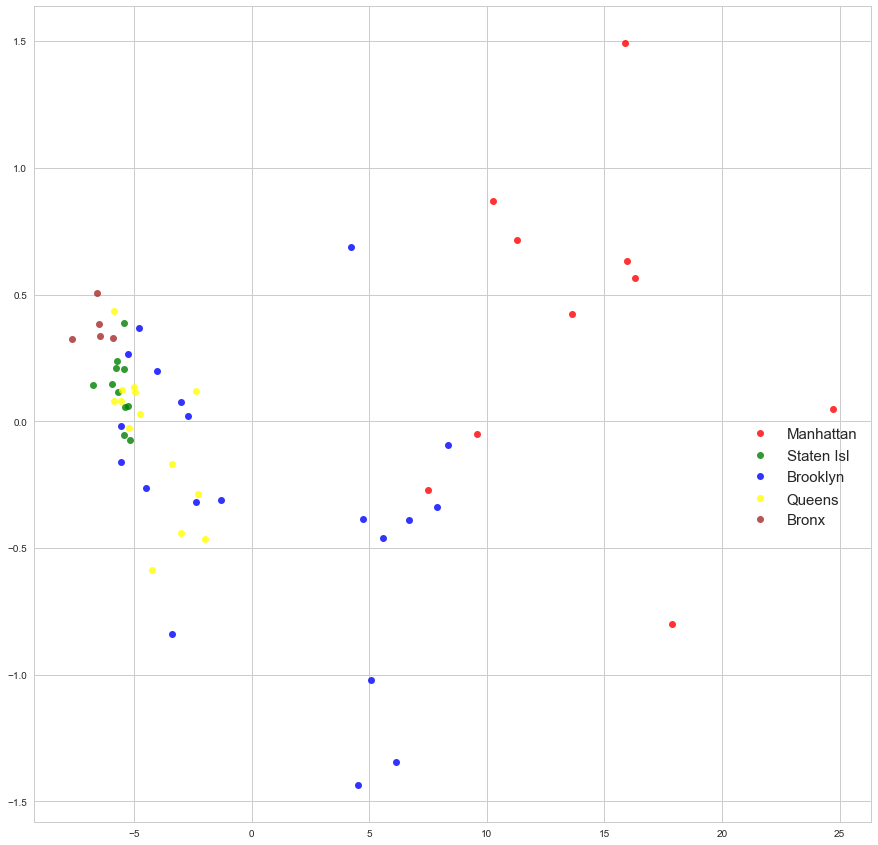

In [666]:
#2-d plot

colors=('gray','red','green','blue','yellow','brown')
fig = plt.figure(figsize=(15,15))
for d in range(1,6):
    plt.plot(np.array(zillow_new[D==d,0]), np.array(zillow_new[D==d,1]),
        'o', color=colors[d], alpha=0.8, label=d)
#plt.xlim((-0.2,0.2))   
#plt.ylim((-0.2,0.2)) 
plt.legend(['Manhattan','Staten Isl','Brooklyn','Queens','Bronx'],bbox_to_anchor=(1, 0.5),fontsize=15)